* TV: Advertising budget spent on TV (in thousands of dollars).
* Radio: Advertising budget spent on radio.
* Newspaper: Advertising budget spent on newspapers.
* Sales: Dependent variable representing sales revenue (in thousands of units).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import necessary package

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the dataset

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data/advertising.csv'
df = pd.read_csv(file_path)

Visualise the first five rows

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Visualise the last five rows

In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


Check to see if there are any Null Values, If yes then you need to fill them or remove them based on the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


As there are no null values check to see is there any duplicates

In [ ]:
df.duplicated().sum()

0

Let us describe the dataset and transpose it for easy visualisation

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
num_cols = len(df.columns)
fig = make_subplots(rows=1, cols=num_cols, subplot_titles=df.columns)

for i, col in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i+1)

fig.update_layout(height=600, width=1500, title_text="Outlier Detection for all Columns")
fig.show()

Removing the Outliers

In [ ]:
from scipy import stats
numerical_cols = ["TV", "Radio", "Newspaper", "Sales"]
z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outliers]

In [ ]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,198.0,146.688384,85.443221,0.7,74.800,149.75,218.475,293.6
Radio,198.0,23.130808,14.862111,0.0,9.925,22.40,36.325,49.6
Newspaper,198.0,29.777273,20.446303,0.3,12.650,25.60,44.050,89.4
Sales,198.0,15.100000,5.271184,1.6,11.000,16.00,18.975,27.0


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame
num_cols = len(df.columns)
fig = make_subplots(rows=1, cols=num_cols, subplot_titles=df.columns)

for i, col in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i+1)

fig.update_layout(height=600, width=1500, title_text="Outlier Detection for all Columns")
fig.show()

See above for the difference in the values.

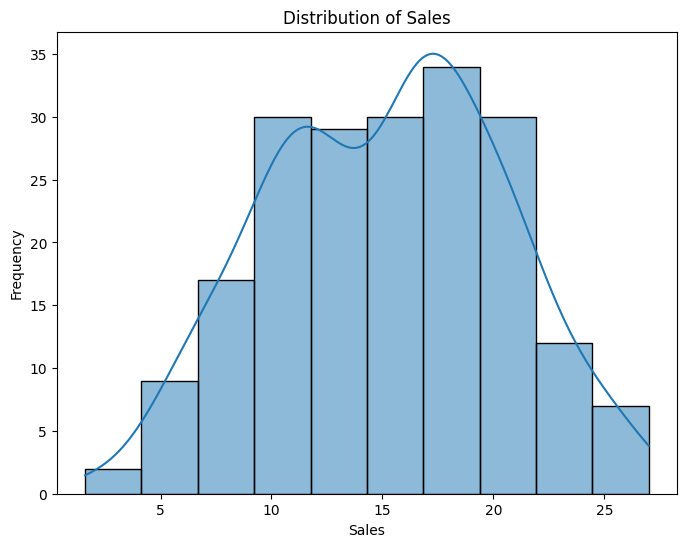

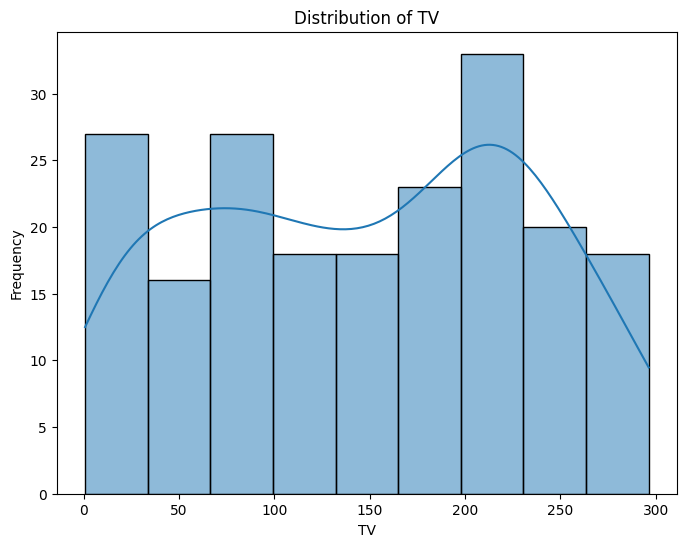

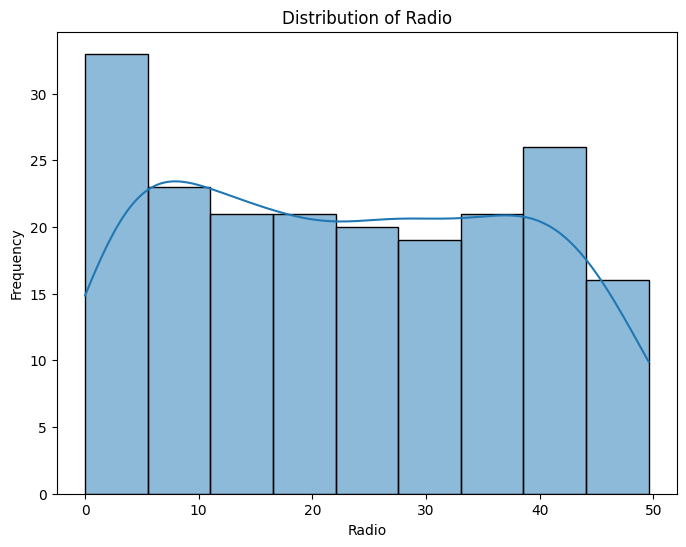

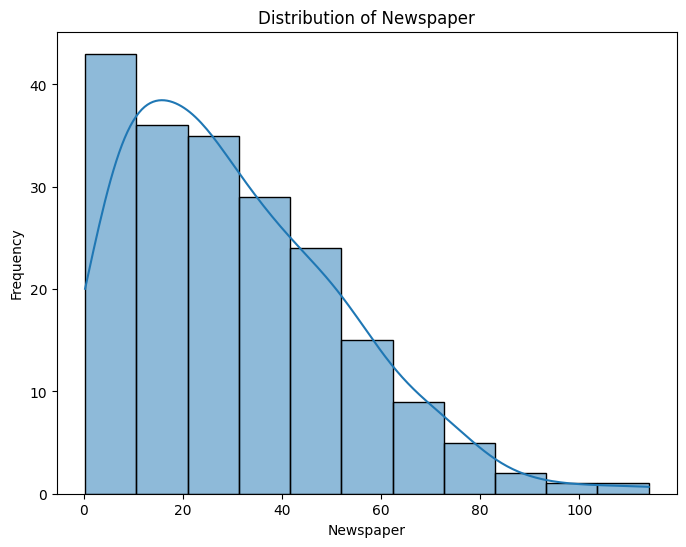

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()
numerical_features = ['TV', 'Radio', 'Newspaper']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

As we are using Linear Regression we are going to do standard Scalar and also pickle the file

In [ ]:
df_no_outliers.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


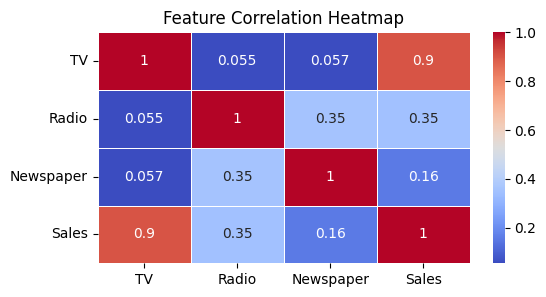

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df_no_outliers.drop(columns=['Sales'])
y = df_no_outliers['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
with open('advertising_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [ ]:
with open('advertising_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
predictions = loaded_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [ ]:
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 1.22
Mean Squared Error (MSE): 2.45
Root Mean Squared Error (RMSE): 1.57
R-squared (R2): 0.9152


In [ ]:
df_no_outliers.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
new_data = pd.DataFrame({
    'TV': [230.1],
    'Radio': [37.8],
    'Newspaper': [69.2]
})
new_data_scaled = loaded_scaler.transform(new_data)
new_prediction = loaded_model.predict(new_data_scaled)
print(f"Predicted Sales: {new_prediction[0]:.2f}")

Predicted Sales: 21.53
